In [558]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from plotly.graph_objs import *
%matplotlib inline

### Загружаем датасет с данными об акциях Apple и посмотрим как он выглядит.

Данные загружены с сайта https://www.alphavantage.co/ с помощью функций:

function=TIME_SERIES_DAILY

symbol=AAPL

outputsize=full

apikey=I3SA9EP8MYTPIZJ3

datatype=csv

P.S. также можно читать файл csv по прямой ссылке

In [559]:
APPLE = pd.read_csv('downloads/daily_AAPL.csv')
APPLE.head()

timestamp    open    high       low   close    volume
0  2020-05-22  315.77  319.23  315.3500  318.89  20450754
1  2020-05-21  318.66  320.89  315.8700  316.85  25672211
2  2020-05-20  316.68  319.52  316.2000  319.23  27876215
3  2020-05-19  315.03  318.52  313.0100  313.14  25432385
4  2020-05-18  313.17  316.50  310.3241  314.96  33843125

#### Берём только данные за последние 10 лет(timestamp>=2010-05-27)
P.S. для актуальности времени также можно использовать библиотеку datetime c параметром datetime.now() для определения сегодняшней даты

In [560]:
APPLE = APPLE[APPLE['timestamp']>='2010-05-27']


Аналогично загружаем данные о ценах акций Facebook и Google, берём данные за последние 10 лет

In [561]:
GOOGLE = pd.read_csv('downloads/daily_GOOGL.csv')
FACEBOOK = pd.read_csv('downloads/daily_FB.csv')
GOOGLE = GOOGLE[GOOGLE['timestamp']>='2010-05-27']
FACEBOOK = FACEBOOK[FACEBOOK['timestamp']>='2010-05-27']

In [562]:
FACEBOOK.shape

(2016, 6)

Размер(shape) датасета FACEBOOK меньше, чем APPLE и GOOGLE, так как Facebook вышел на IPO только в 2012 году

Разворачиваем датасет, чтобы даты были во временном порядке

In [563]:
APPLE = APPLE.sort_values(by='timestamp')
GOOGLE = GOOGLE.sort_values(by='timestamp')
FACEBOOK = FACEBOOK.sort_values(by='timestamp')
APPLE['timestamp'] = pd.to_datetime(APPLE['timestamp'])
APPLE = APPLE.set_index('timestamp')
GOOGLE['timestamp'] = pd.to_datetime(GOOGLE['timestamp'])
GOOGLE = GOOGLE.set_index('timestamp')
FACEBOOK['timestamp'] = pd.to_datetime(FACEBOOK['timestamp'])
FACEBOOK = FACEBOOK.set_index('timestamp')

### Вычисляем daily returns 

In [564]:
APPLE['daily returns'] = np.diff(APPLE['close'].values, axis=0)/(APPLE['close'].iloc[:-1])
FACEBOOK['daily returns'] = np.diff(FACEBOOK['close'].values, axis=0)/(FACEBOOK['close'].iloc[:-1])
GOOGLE['daily returns'] = np.diff(GOOGLE['close'].values, axis=0)/(GOOGLE['close'].iloc[:-1])

### Статистика распределения daily returns для акций APPLE (частота,среднее значение, стандартное отклонение, минимальное значение, 25-й процентиль, 50-й процентиль, 75-й процентиль, максимальное значение):

       daily returns
count    2514.000000
mean        0.000669
std         0.024290
min        -0.854857
25%        -0.007085
50%         0.000788
75%         0.009881
max         0.119808


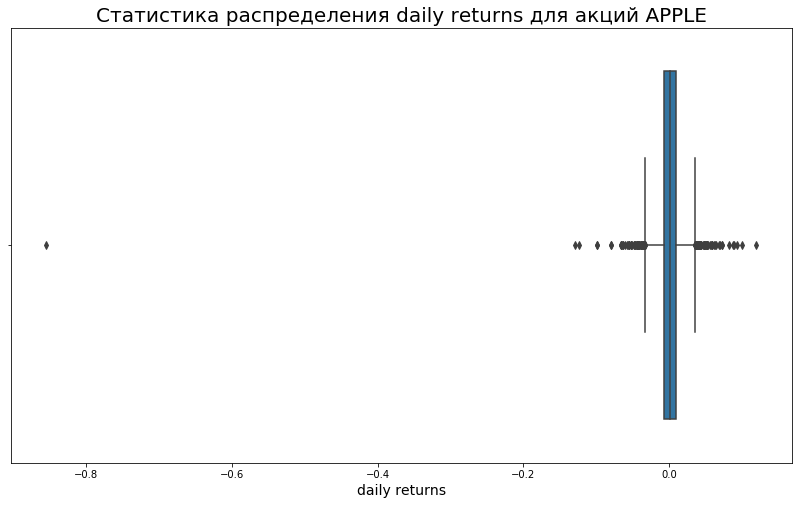

In [565]:
print(APPLE[['daily returns']].describe())
plt.figure(figsize=(14,8))
sns.boxplot(APPLE['daily returns'], orient='h').set_title(
    'Статистика распределения daily returns для акций APPLE', size = 20, color = 'black')
plt.xlabel('daily returns', size = 14, color = 'black')
plt.show()

### Статистика распределения daily returns для акций FACEBOOK (частота,среднее значение, стандартное отклонение, минимальное значение, 25-й процентиль, 50-й процентиль, 75-й процентиль, максимальное значение)

       daily returns
count    2015.000000
mean        0.001174
std         0.023512
min        -0.189609
25%        -0.009081
50%         0.001064
75%         0.011965
max         0.296077


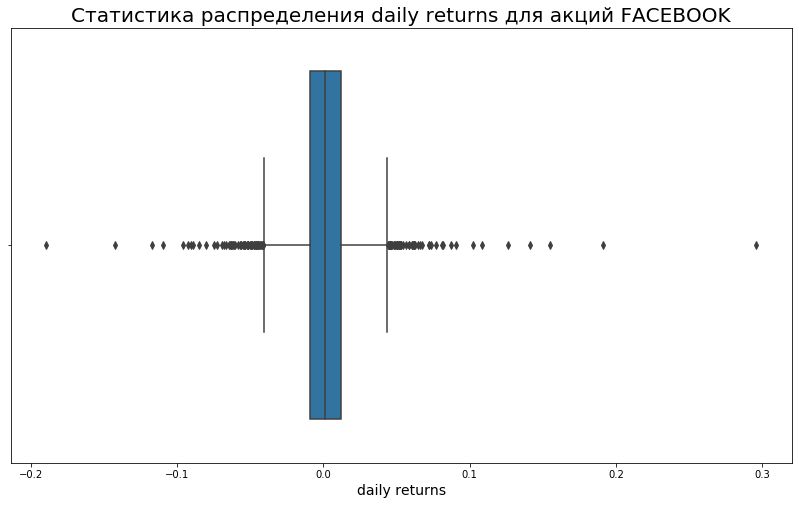

In [566]:
print(FACEBOOK[['daily returns']].describe())
plt.figure(figsize=(14,8))
sns.boxplot(FACEBOOK['daily returns'], orient='h').set_title(
    'Статистика распределения daily returns для акций FACEBOOK', size = 20, color = 'black')
plt.xlabel('daily returns', size = 14, color = 'black')
plt.show()

### Статистика распределения daily returns для акций GOOGLE (частота,среднее значение, стандартное отклонение, минимальное значение, 25-й процентиль, 50-й процентиль, 75-й процентиль, максимальное значение)

       daily returns
count    2514.000000
mean        0.000627
std         0.019019
min        -0.496520
25%        -0.006566
50%         0.000653
75%         0.008615
max         0.162584


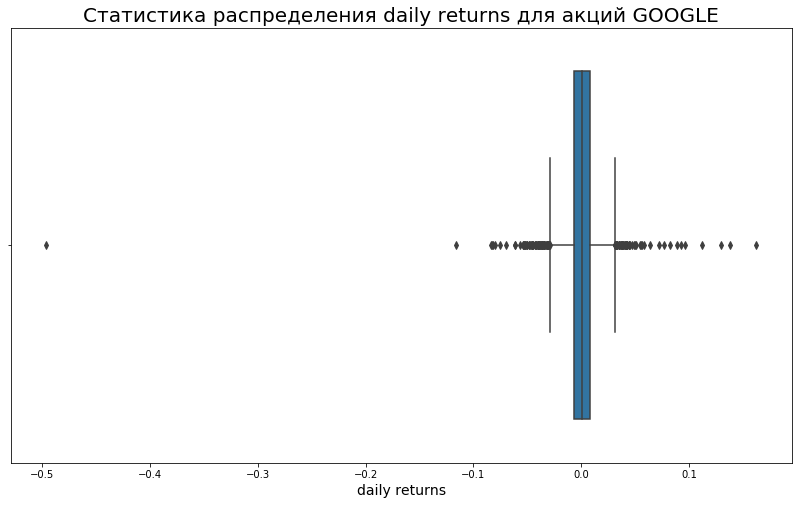

In [567]:
print(GOOGLE[['daily returns']].describe())
plt.figure(figsize=(14,8))
sns.boxplot(GOOGLE['daily returns'], orient='h').set_title(
    'Статистика распределения daily returns для акций GOOGLE', size = 20, color = 'black')
plt.xlabel('daily returns', size = 14, color = 'black')
plt.show()

### Построим Q-Q графики

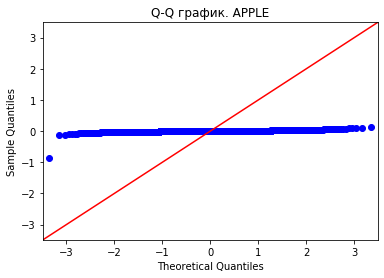

In [568]:
sm.qqplot(data=APPLE['daily returns'].dropna(), line='45')
plt.title('Q-Q график. APPLE')
plt.show()

#### Точки нормального графика Q-Q дают представление об одномерной нормальности набора данных. 

#### Данные daily returns APPLE не распределены нормально, так как точки отклоняются от базовой линии 45 градусов.

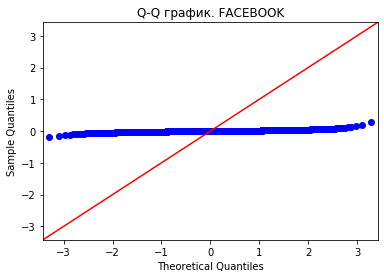

In [569]:
fig = sm.qqplot(data=FACEBOOK['daily returns'].dropna(), line='45')
plt.title('Q-Q график. FACEBOOK')
plt.show()

#### Данные daily returns FACEBOOK не распределены нормально, так как точки отклоняются от базовой линии 45 градусов.

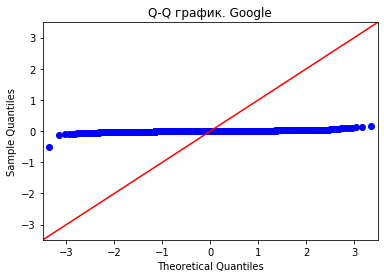

In [570]:
fig = sm.qqplot(data=GOOGLE['daily returns'].dropna(), line='45')
plt.title('Q-Q график. Google')
plt.show()

#### Данные daily returns GOOGLE не распределены нормально, так как точки отклоняются от базовой линии 45 градусов.

## Проведем тест Шапиро-Вилка для проверки схожести с распределением Гаусса

In [571]:
w_apple, pvalue_apple = stats.shapiro(APPLE['daily returns'].dropna())
w_apple, pvalue_apple 

(0.5406547784805298, 0.0)

In [572]:
w_facebook, pvalue_facebook = stats.shapiro(FACEBOOK['daily returns'].dropna())
w_facebook, pvalue_facebook

(0.8673657178878784, 2.6420630555378116e-38)

In [573]:
w_google, pvalue_google = stats.shapiro(GOOGLE['daily returns'].dropna())
w_google, pvalue_google

(0.7062130570411682, 0.0)

### Результаты теста Шапиро-Вилка:

Значения w значительно меньше 0.99, а pvalue меньше 0.05.
Из этого можно сделать предположение о том, данные не распределены нормально.

## Построим гистограммы распределения

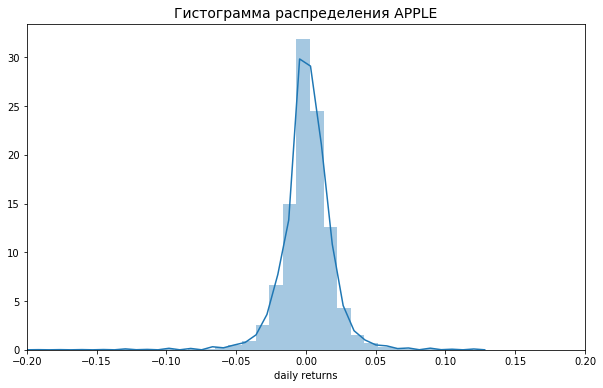

In [574]:
plt.subplots(figsize=(10,6))
sns_plot = sns.distplot(APPLE['daily returns'],bins=100)
fig = sns_plot.get_figure()
plt.xlim(-0.2,0.2)
plt.title('Гистограмма распределения APPLE',size = 14)
plt.show()

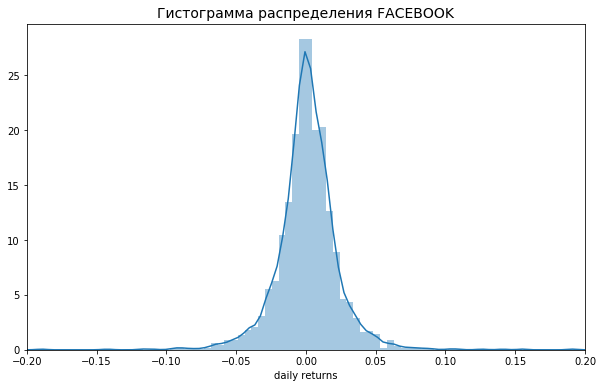

In [575]:
plt.subplots(figsize=(10,6))
sns_plot = sns.distplot(FACEBOOK['daily returns'],bins=100)
fig = sns_plot.get_figure()
plt.xlim(-0.2,0.2)
plt.title('Гистограмма распределения FACEBOOK',size = 14)
plt.show()

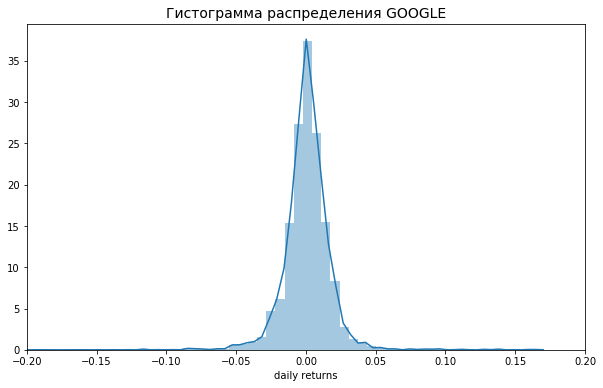

In [576]:
plt.subplots(figsize=(10,6))
sns_plot = sns.distplot(GOOGLE['daily returns'],bins=100)
fig = sns_plot.get_figure()
plt.xlim(-0.2,0.2)
plt.title('Гистограмма распределения GOOGLE',size = 14)
plt.show()

## Тест Андерсона-Дарлинга

In [577]:
anderson = stats.anderson(APPLE['daily returns'].dropna())
for i in range(len(anderson.critical_values)):
    sl, cv = anderson.significance_level[i], anderson.critical_values[i]
    if anderson.statistic < anderson.critical_values[i]:
        print('%.3f: %.3f, Согласно тесту Андерсона-Дарлинга данные APPLE\
 распределены нормально (Не отвергаем нулевую гипотезу)' % (sl, cv))
    else:
        print('%.3f: %.3f, Согласно тесту Андерсона-Дарлинга данные APPLE\
 не распределены нормально (отвергаем нулевую гипотезу)' % (sl, cv))

15.000: 0.575, Согласно тесту Андерсона-Дарлинга данные APPLE не распределены нормально (отвергаем нулевую гипотезу)
10.000: 0.655, Согласно тесту Андерсона-Дарлинга данные APPLE не распределены нормально (отвергаем нулевую гипотезу)
5.000: 0.786, Согласно тесту Андерсона-Дарлинга данные APPLE не распределены нормально (отвергаем нулевую гипотезу)
2.500: 0.917, Согласно тесту Андерсона-Дарлинга данные APPLE не распределены нормально (отвергаем нулевую гипотезу)
1.000: 1.090, Согласно тесту Андерсона-Дарлинга данные APPLE не распределены нормально (отвергаем нулевую гипотезу)


In [578]:
anderson = stats.anderson(FACEBOOK['daily returns'].dropna())
for i in range(len(anderson.critical_values)):
    sl, cv = anderson.significance_level[i], anderson.critical_values[i]
    if anderson.statistic < anderson.critical_values[i]:
        print('%.3f: %.3f, Согласно тесту Андерсона-Дарлинга данные FACEBOOK\
 распределены нормально (Не отвергаем нулевую гипотезу)' % (sl, cv))
    else:
        print('%.3f: %.3f, Согласно тесту Андерсона-Дарлинга данные FACEBOOK\
 не распределены нормально (отвергаем нулевую гипотезу)' % (sl, cv))

15.000: 0.575, Согласно тесту Андерсона-Дарлинга данные FACEBOOK не распределены нормально (отвергаем нулевую гипотезу)
10.000: 0.655, Согласно тесту Андерсона-Дарлинга данные FACEBOOK не распределены нормально (отвергаем нулевую гипотезу)
5.000: 0.785, Согласно тесту Андерсона-Дарлинга данные FACEBOOK не распределены нормально (отвергаем нулевую гипотезу)
2.500: 0.916, Согласно тесту Андерсона-Дарлинга данные FACEBOOK не распределены нормально (отвергаем нулевую гипотезу)
1.000: 1.090, Согласно тесту Андерсона-Дарлинга данные FACEBOOK не распределены нормально (отвергаем нулевую гипотезу)


In [579]:
anderson = stats.anderson(GOOGLE['daily returns'].dropna())
for i in range(len(anderson.critical_values)):
    sl, cv = anderson.significance_level[i], anderson.critical_values[i]
    if anderson.statistic < anderson.critical_values[i]:
        print('%.3f: %.3f, Согласно тесту Андерсона-Дарлинга данные GOOGLE\
 распределены нормально (Не отвергаем нулевую гипотезу)' % (sl, cv))
    else:
        print('%.3f: %.3f, Согласно тесту Андерсона-Дарлинга данные GOOGLE\
 не распределены нормально (отвергаем нулевую гипотезу)' % (sl, cv))

15.000: 0.575, Согласно тесту Андерсона-Дарлинга данные GOOGLE не распределены нормально (отвергаем нулевую гипотезу)
10.000: 0.655, Согласно тесту Андерсона-Дарлинга данные GOOGLE не распределены нормально (отвергаем нулевую гипотезу)
5.000: 0.786, Согласно тесту Андерсона-Дарлинга данные GOOGLE не распределены нормально (отвергаем нулевую гипотезу)
2.500: 0.917, Согласно тесту Андерсона-Дарлинга данные GOOGLE не распределены нормально (отвергаем нулевую гипотезу)
1.000: 1.090, Согласно тесту Андерсона-Дарлинга данные GOOGLE не распределены нормально (отвергаем нулевую гипотезу)


## Построим графики daily returns за последние 10 лет и оценим их стационарность во времени

In [580]:
trace1=(Scatter(x=APPLE.index,y=APPLE['daily returns'], mode='lines+markers'))
layout = Layout(title='График изменений цен закрытия для APPLE ',\
                  yaxis_title='Изменение',xaxis_title='Дата')
Figure(data=[trace1],layout=layout)


### Мы видим сильно изменение 9 июня 2014 года. В этот день Apple приняла решение о дроблении своих акций. Их стало в семь раз больше, а цена каждой упала ровно на столько же. 


In [581]:
trace1=(Scatter(x=FACEBOOK.index,y=FACEBOOK['daily returns'], mode='lines+markers'))
layout = Layout(title='График изменений цен закрытия для FACEBOOK ',\
                  yaxis_title='Изменение',xaxis_title='Дата')
Figure(data=[trace1],layout=layout)


### Рассмотрим самые большие изменения на графике.
#### 24 июля 2013 года, когда представители Facebook сообщили о росте продаж мобильной рекламы на 75 процентов за кварта акции компании сильно выросли в цене. 
#### А 25 июля 2018 года акции рухнули после отчёта 2 квартала 2018 года, аналитики прогнозировали лучшие результаты.


In [582]:
trace1=(Scatter(x=GOOGLE.index,y=GOOGLE['daily returns'], mode='lines+markers'))
layout = Layout(title='График изменений цен закрытия для  GOOGLE',\
                  yaxis_title='Изменение',xaxis_title='Дата')
Figure(data=[trace1],layout=layout)


 ### В начале апреля компания Google провела сплит акций «2 к 1» Акции упали вдвое, но их стало в два раза больше. На капитализации компании это никак не отразилось. 

### Покажем график стоимости акций компаний

In [583]:
trace1=(Scatter(x=GOOGLE.index,y=GOOGLE['close'], mode='lines'))
layout = Layout(title='График стоимости акций для  GOOGLE',\
                  yaxis_title='Изменение',xaxis_title='Дата')
Figure(data=[trace1],layout=layout)

In [584]:
trace1=(Scatter(x=APPLE.index,y=APPLE['close'], mode='lines'))
layout = Layout(title='График стоимости акций для  APPLE',\
                  yaxis_title='Изменение',xaxis_title='Дата')
Figure(data=[trace1],layout=layout)

In [585]:
trace1=(Scatter(x=FACEBOOK.index,y=FACEBOOK['close'], mode='lines'))
layout = Layout(title='График стоимости акций для  FACEBOOK',\
                  yaxis_title='Изменение',xaxis_title='Дата')
Figure(data=[trace1],layout=layout)

## Определим наличие сезонности
### Для этого разложим наши данные на трендовый, сезонный и остаточный компоненты

#### Для GOOGLE:

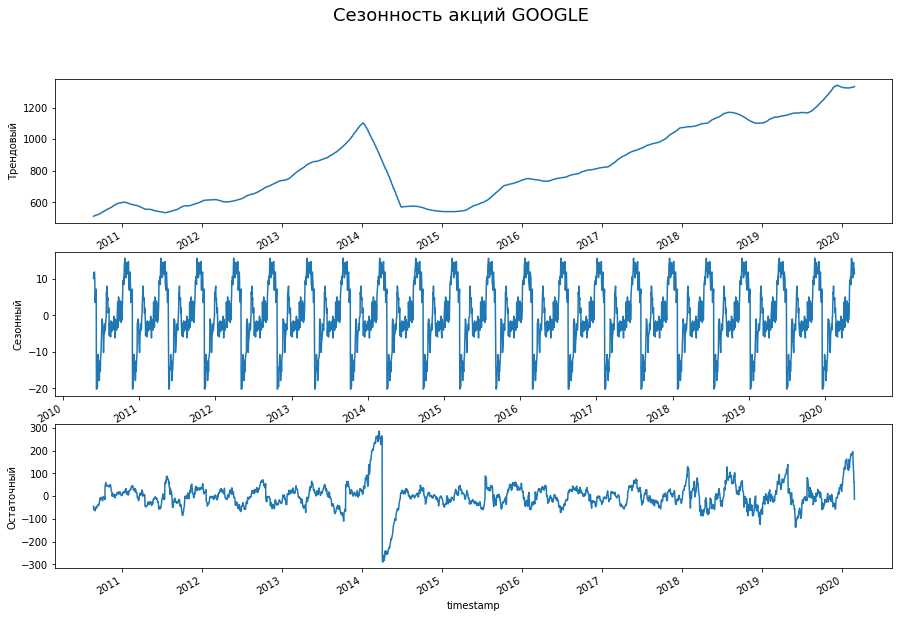

In [586]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(GOOGLE.close, model='additive',period=120)
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10))
result.trend.plot(ax=ax1)
result.seasonal.plot(ax=ax2)
result.resid.plot(ax=ax3)
ax1.set_ylabel('Трендовый')
ax2.set_ylabel('Сезонный')
ax3.set_ylabel('Остаточный')
fig.suptitle('Сезонность акций GOOGLE', size=18)
plt.show()

#### Для APPLE:

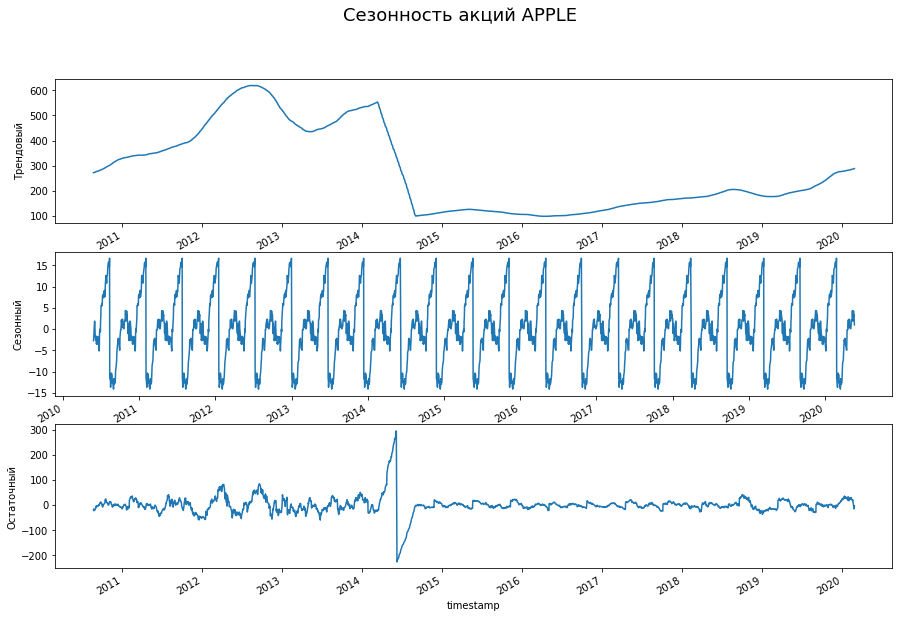

In [587]:
result = seasonal_decompose(APPLE.close, model='additive',period=120)
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10))
result.trend.plot(ax=ax1)
result.seasonal.plot(ax=ax2)
result.resid.plot(ax=ax3)
ax1.set_ylabel('Трендовый')
ax2.set_ylabel('Сезонный')
ax3.set_ylabel('Остаточный')
fig.suptitle('Сезонность акций APPLE', size=18)
plt.show()


#### Для FACEBOOK

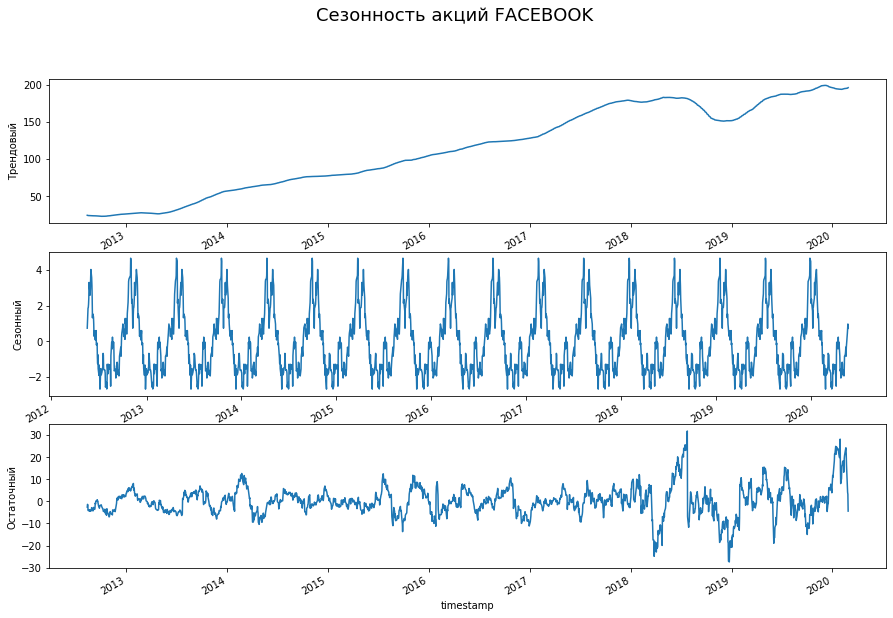

In [588]:
result = seasonal_decompose(FACEBOOK.close, model='additive',period=120)
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,10))
result.trend.plot(ax=ax1)
result.seasonal.plot(ax=ax2)
result.resid.plot(ax=ax3)
ax1.set_ylabel('Трендовый')
ax2.set_ylabel('Сезонный')
ax3.set_ylabel('Остаточный')
fig.suptitle('Сезонность акций FACEBOOK', size=18)
plt.show()

## Как мы можем заметить стоимость всех акций имеет ярко выраженный тренд и сезонность

## Посчитаем коэффициенты корреляции Спирмена

### Для Google:

In [589]:
GOOGLE_correlation = GOOGLE.corr(method='spearman')
GOOGLE.corr(method='spearman')

open      high       low     close    volume  daily returns
open           1.000000  0.999548  0.999402  0.998931 -0.419464      -0.008642
high           0.999548  1.000000  0.999331  0.999455 -0.414393      -0.008929
low            0.999402  0.999331  1.000000  0.999534 -0.426944      -0.007954
close          0.998931  0.999455  0.999534  1.000000 -0.421801      -0.009696
volume        -0.419464 -0.414393 -0.426944 -0.421801  1.000000      -0.014515
daily returns -0.008642 -0.008929 -0.007954 -0.009696 -0.014515       1.000000

### Для FACEBOOK

In [590]:
FACEBOOK_correlation = FACEBOOK.corr(method='spearman')
FACEBOOK.corr(method='spearman')

open      high       low     close    volume  daily returns
open           1.000000  0.999650  0.999548  0.999203 -0.634451       0.003626
high           0.999650  1.000000  0.999454  0.999617 -0.628647       0.003148
low            0.999548  0.999454  1.000000  0.999606 -0.642302       0.002740
close          0.999203  0.999617  0.999606  1.000000 -0.635424       0.001121
volume        -0.634451 -0.628647 -0.642302 -0.635424  1.000000       0.000754
daily returns  0.003626  0.003148  0.002740  0.001121  0.000754       1.000000

### Для APPLE

In [591]:
APPLE_correlation = APPLE.corr(method='spearman')
APPLE.corr(method='spearman')

open      high       low     close    volume  daily returns
open           1.000000  0.999825  0.999781  0.999591 -0.686149      -0.009078
high           0.999825  1.000000  0.999739  0.999803 -0.682700      -0.009548
low            0.999781  0.999739  1.000000  0.999810 -0.691866      -0.009429
close          0.999591  0.999803  0.999810  1.000000 -0.687510      -0.010142
volume        -0.686149 -0.682700 -0.691866 -0.687510  1.000000      -0.010387
daily returns -0.009078 -0.009548 -0.009429 -0.010142 -0.010387       1.000000

## Посмотрим взаимосвязь между daily returns и остальными параметрами, используя коэффициент корреляции
### Для Google:

In [592]:
GOOGLE_correlation['daily returns'].sort_values(ascending=True)

volume          -0.014515
close           -0.009696
high            -0.008929
open            -0.008642
low             -0.007954
daily returns    1.000000
Name: daily returns, dtype: float64

### Для FACEBOOK

In [593]:
FACEBOOK_correlation['daily returns'].sort_values(ascending=True)

volume           0.000754
close            0.001121
low              0.002740
high             0.003148
open             0.003626
daily returns    1.000000
Name: daily returns, dtype: float64

### Для Apple

In [594]:
APPLE_correlation['daily returns'].sort_values(ascending=True)

volume          -0.010387
close           -0.010142
high            -0.009548
low             -0.009429
open            -0.009078
daily returns    1.000000
Name: daily returns, dtype: float64

## Значения коэффициентов корреляции Спирмена близки к 0, а значит линейная связь между daily returns и другими величинами отсутствует

# Задание 3
### Сгенерируем 3 случайных реализации f1,f2,f3 с величинами, имеющими распределение Гаусса 

In [595]:
f1,f2,f3=[],[],[]
for i in range(len(GOOGLE.dropna().index)):
    f1.append(stats.norm.rvs(0,1))
    f2.append(stats.norm.rvs(0,1))
    f3.append(stats.norm.rvs(0,1))

### Для Google посчитаем значения Profit and Loss и кумулятивную сумму

In [596]:
GOOGLE['pnl1']=GOOGLE['daily returns'].dropna()*f1
GOOGLE['pnl2']=GOOGLE['daily returns'].dropna()*f2
GOOGLE['pnl3']=GOOGLE['daily returns'].dropna()*f3
GOOGLE['cumsum1'] = GOOGLE['pnl1'].apply(lambda x: float(np.cumsum(x)))
GOOGLE['cumsum2'] = GOOGLE['pnl2'].apply(lambda x: float(np.cumsum(x)))
GOOGLE['cumsum3'] = GOOGLE['pnl3'].apply(lambda x: float(np.cumsum(x)))


### Построим графики Profit and Loss

In [597]:
trace1=(Scatter(x=GOOGLE.index,y=GOOGLE['pnl1'], mode='markers',name='PNL 1'))
trace2=(Scatter(x=GOOGLE.index,y=GOOGLE['pnl2'], mode='markers',name='PNL 2'))
trace3=(Scatter(x=GOOGLE.index,y=GOOGLE['pnl3'], mode='markers',name='PNL 3'))
layout = Layout(title='Разброс значений Profit and Loss ',yaxis_title='Значение',xaxis_title='День')
Figure(data=[trace1,trace2,trace3],layout=layout)

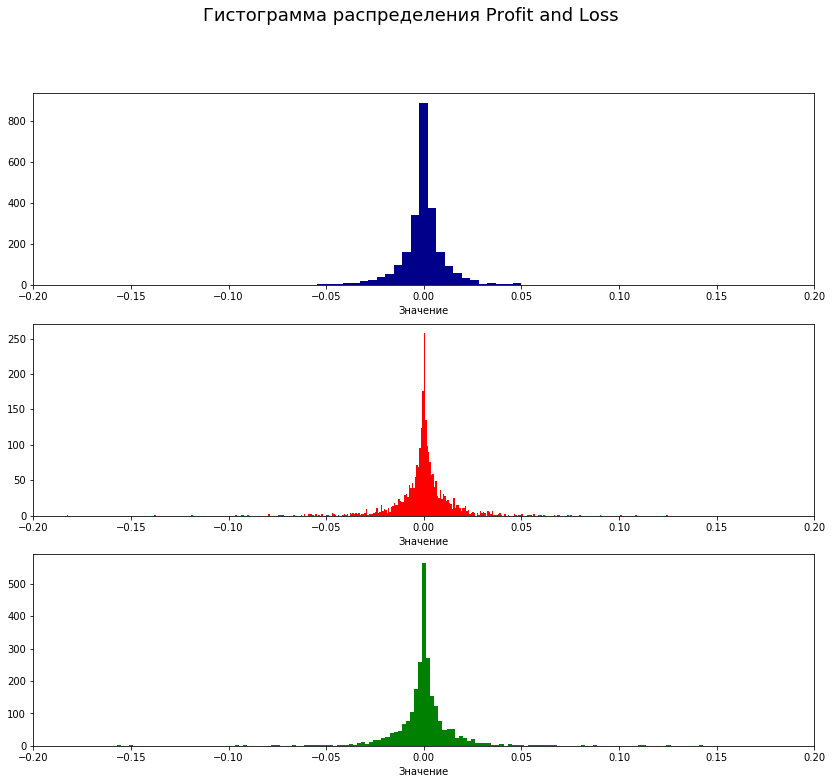

In [598]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(14,12))
ax1.hist(GOOGLE['pnl1'].dropna(),bins=300,color='darkblue')
ax2.hist(GOOGLE['pnl2'].dropna(),bins=600,color='red')
ax3.hist(GOOGLE['pnl3'].dropna(),bins=600,color='green')
ax1.set_xlabel('Значение')
ax2.set_xlabel('Значение')
ax3.set_xlabel('Значение')
ax1.set_xlim(-0.2,0.2)
ax2.set_xlim(-0.2,0.2)
ax3.set_xlim(-0.2,0.2)
fig.suptitle('Гистограмма распределения Profit and Loss',size = 18)
plt.show()

In [599]:
import plotly.figure_factory as ff
import plotly.offline as offline
fig = ff.create_scatterplotmatrix(
    GOOGLE[['pnl1','pnl2','pnl3','daily returns']],\
    diag='histogram',\
    index='daily returns', size=7, height=900, width=900,\
    title='Диаграммы рассеяния Profit and Loss',)
offline.iplot(fig)

### Построим график кумулятивной суммы

In [600]:
trace1=(Scatter(x=GOOGLE.index,y=GOOGLE['cumsum1'].dropna(), mode='lines',name='PNL 1'))
trace2=(Scatter(x=GOOGLE.index,y=GOOGLE['cumsum2'].dropna(), mode='lines',name='PNL 2'))
trace3=(Scatter(x=GOOGLE.index,y=GOOGLE['cumsum3'].dropna(), mode='lines',name='PNL 3'))
layout = Layout(title='График кумулятивной суммы cumsum ',yaxis_title='Значение',xaxis_title='День')
Figure(data=[trace1,trace2,trace3],layout=layout)

### Задание 4
#### Коэффициент Sharpe Ratio 

In [601]:
Sharpe_Ratio = (GOOGLE['pnl1']/GOOGLE['pnl1'].std()).mean()
print('Sharpe Ratio =',Sharpe_Ratio)

Sharpe Ratio = -0.03277224187877331


#### Посчитаем sign()

In [602]:
def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    elif x == 0:
        return 0
GOOGLE['sign_r'] = GOOGLE['daily returns'].dropna().apply(lambda x: sign(x))
GOOGLE['f'] = 1
GOOGLE['f'] = GOOGLE['f'].iloc[:-1]*f1
GOOGLE['sign_f'] = GOOGLE['f'].dropna().apply(lambda x: sign(x))


#### Найдем hit rate

In [603]:
hit_rate = len(GOOGLE[GOOGLE['sign_f']==GOOGLE['sign_r']].index)/len(GOOGLE.index)
print('hit rate =',hit_rate)
        


hit rate = 0.494234592445328


In [604]:
sign_r = GOOGLE['sign_r'].dropna().values
def hit_rate():
    global count
    count=0
    for i in range(len(f)):
        f[i]=sign(f[i])
        if f[i]==sign_r[i]:
            count+=1
    return count/len(f)
    
    

### Создадим множество реализаций f (создадим 100 реализаций)

In [605]:
Sharpe_Ratio_pnl = []
hit_rate_pnl = []
count=0
for i in range(100):
    f=[]
    for i in range(len(GOOGLE.dropna().index)):
        f.append(stats.norm.rvs(0,1))
    pnl=GOOGLE['daily returns'].dropna()*f
    Sharpe_Ratio_pnl.append((pnl/pnl.std()).mean())
    hit_rate_pnl.append(hit_rate())
    

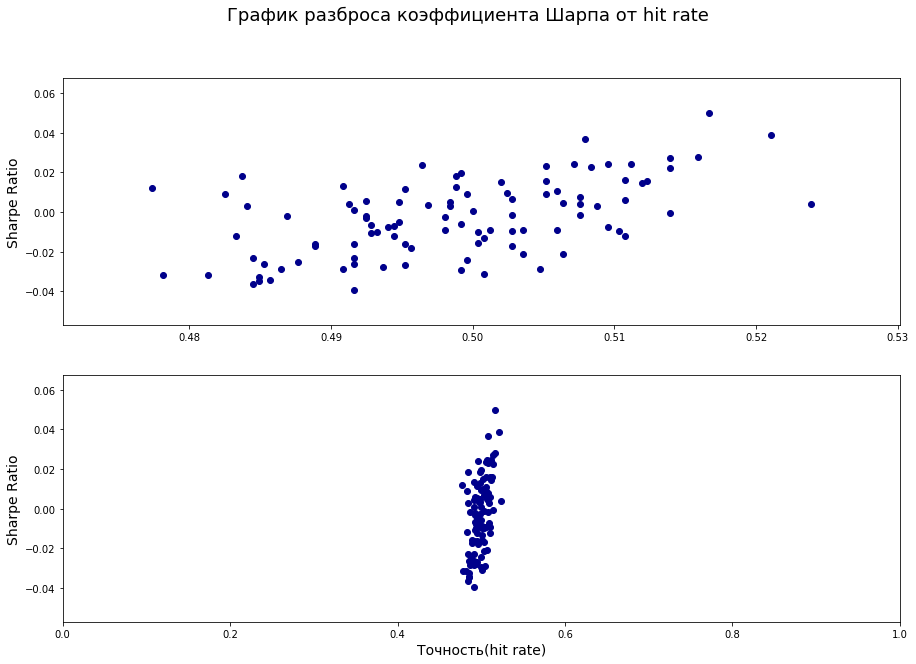

In [606]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,10))
ax1.scatter(hit_rate_pnl,Sharpe_Ratio_pnl, color='darkblue')
ax2.scatter(hit_rate_pnl,Sharpe_Ratio_pnl, color='darkblue')
plt.xlim(0,1.0)
plt.xlabel('Точность(hit rate)',size=14)
plt.ylabel('Sharpe Ratio',size=14)
ax1.set_ylabel('Sharpe Ratio',size=14)
plt.suptitle('График разброса коэффициента Шарпа от hit rate',size = 18)
plt.show()

# Заключение
## Мы загрузили данные акций компаний Google, Apple и Facebook за последние 10 лет, проанализировали ежедневные изменения цен(daily returns) и отвергли нулевую гипотезу о нормальном распределении данных, проведя тесты Андерсона-Дарлинга и Шапиро-Вилка, а также построив графики квантиль-квантиль.
## Выяснили, что цены на акции имеют ярко выраженный восходящий тренд и сезонность, а график изменения цен( daily returns) стационарен времени.
## Посчитали коэффициент корреляции Спирмена, по которому не увидели взаимосвязи между данными.
## Сгенерировали случайные реализации по методу Гаусса , построили графики PNL (Profit and Loss), кумулятивной суммы PNL
## Посчитали коэффициент Шарпа и оценили как часто наш прогноз совпадает по направлению движения акции Google.

### Работу выполнил:
### Державин Никита
### +7(925)417-98-99
### nikita.derzh@mail.ru